In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.


案例：数据新闻的另一种视角与实现——《转角遇到爱》作品分析 #43

- 作品链接：https://h5.thepaper.cn/html/zt/2018/08/seekinglove/index.html
- 简介：获得2018年SND（美国新闻媒体视觉设计协会）最佳数字设计铜奖。选一个晴天的周日，从上海人民广场地铁站9号口出门，左手边就是闻名全国的人民广场相亲角。五六十岁模样的大叔大妈们带着伞和小板凳，在这里为他们的晚辈寻觅一份姻缘。澎湃新闻 www.thepaper.cn 和姐妹英文媒体“第六声”的数据记者花费了六个周末的时间，收集了874份相亲广告。从中可以读出关于618位女士和256位男士的觅爱故事。
- 解读：https://github.com/data-journalism/data-journalism.github.io/discussions/43

In [2]:
ls './data/'

MPs' expenses claims, Jul-Dec, 2009.xlsx
data.js*
db_new.csv


In [4]:
df = pd.read_csv('./data/db_new.csv')
df.head()

,id,Gender.self,Year.self,Born.self,Hukou.self,Live.self,Marriage.self,Height.self,Weight.self,Looking.self,...,Hobby.wanted,Edu.min.wanted,Edu.min.n.wanted,Job.wanted,Salary.min.wanted,Apt.wanted,Family.wanted,Other.wanted,interesting.wanted,Similar.wanted
0,1,女性,1987,N,N,N,N,1.65,N,皮肤白，大眼睛,...,无不良嗜好,N,N,稳定,N,有婚房,N,81年不考虑。家境较好，有独立婚房。靠近长宁区,81年不考虑,N
1,2,男性,1983,浙江,有上海户口,N,N,1.83,N,N,...,N,本科,4,N,N,要有婚房,单亲家庭勿扰,89年不要，独生女，家庭条件相当,89年不要,Y
2,3,男性,1970,上海,有上海户口,N,单身,1.75,N,N,...,N,N,N,白领工作,N,N,N,条件相当,白领工作,Y
3,4,男性,1983,上海,有上海户口,上海,N,1.8,N,N,...,N,本科,4,稳定工作,N,N,N,N,本分,N
4,5,女性,1988,上海,有上海户口,上海,N,1.69,N,清纯、秀丽、有气质,...,不抽烟,本科,4,N,N,N,N,条件相当,不抽烟,Y


In [5]:
len(df)

874

In [6]:
df.describe()

,id,Year.self
count,874.000000,874.000000
mean,438.929062,1982.425629
std,253.149643,7.339553
min,1.000000,1945.000000
25%,219.500000,1980.000000
50%,439.500000,1984.000000
75%,657.750000,1987.000000
max,876.000000,1995.000000


In [7]:
df.columns

Index(['id', 'Gender.self', 'Year.self', 'Born.self', 'Hukou.self',
       'Live.self', 'Marriage.self', 'Height.self', 'Weight.self',
       'Looking.self', 'Personality.self', 'Edu.self', 'Eduno.self',
       'top.self', 'Abroad.self', 'Major.self', 'Job.self', 'Salary.self',
       'Apt.self', 'Family.self', 'Hobby.self', 'Other.self',
       'interesting.self', 'Gender.wanted', 'Year.max.wanted',
       'Year.min.wanted', 'Year.text.wanted', 'Hukou.wanted', 'Live.wanted',
       'Marriage.wanted', 'Height.min.wanted', 'Looking.wanted',
       'Personality.wanted', 'Hobby.wanted', 'Edu.min.wanted',
       'Edu.min.n.wanted', 'Job.wanted', 'Salary.min.wanted', 'Apt.wanted',
       'Family.wanted', 'Other.wanted', 'interesting.wanted',
       'Similar.wanted'],
      dtype='object')

In [11]:
df['Age'] = 2018 - df['Year.self']

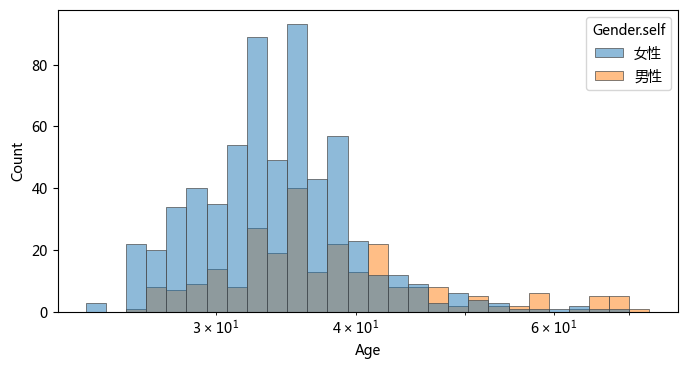

In [16]:
plt.figure(figsize =(8, 4), dpi = 100)

sns.histplot(
    df,
    x="Age", hue="Gender.self",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
);

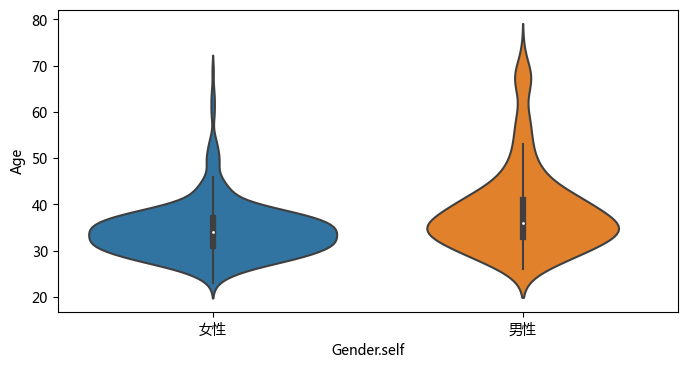

In [18]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
plt.figure(figsize =(8, 4), dpi = 100)
sns.violinplot(x="Gender.self", y="Age", data=df);

In [28]:
# deal with missing data
df['Height.self'] = [float(i) if i != 'N' else np.nan for i in df['Height.self']]

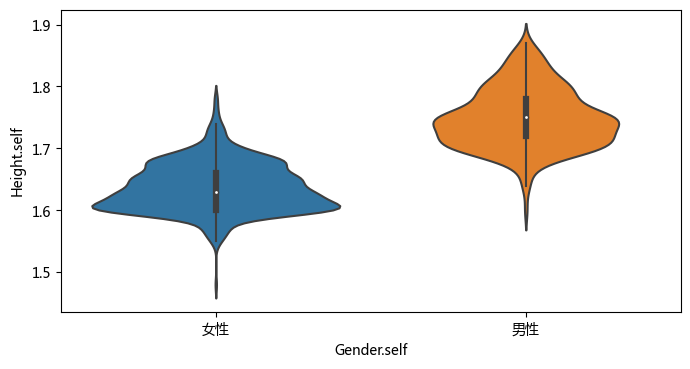

In [31]:
plt.figure(figsize =(8, 4), dpi = 100)
sns.violinplot(x="Gender.self", y="Height.self", data=df);

In [20]:
df['Hukou.self'].unique()

array(['N', '有上海户口', '没有上海户口'], dtype=object)

In [21]:
df['Hukou.self'].value_counts()

有上海户口     421
N         409
没有上海户口     44
Name: Hukou.self, dtype: int64

In [34]:
df['Looking.self'].value_counts()

N          628
气质佳         14
帅气           9
貌佳清秀         8
清秀           6
          ... 
肤白、身材好       1
帅            1
品貌端庄         1
形象好、气质佳      1
英俊帅气         1
Name: Looking.self, Length: 159, dtype: int64

In [35]:
df['Personality.self']

0                   N
1                   N
2                   N
3                   N
4       善良、进取、阳光、有责任心
            ...      
869                 N
870    性格文静、善良贤惠、老实本分
871                 N
872                善良
873        开朗、稳重、有责任心
Name: Personality.self, Length: 874, dtype: object

In [39]:
df['Edu.self'].value_counts()

本科     373
研究生    272
N      120
大专      81
博士      14
中专       7
高中       6
初中       1
Name: Edu.self, dtype: int64

In [56]:
df['Eduno.self'].value_counts()

4    373
5    272
N    120
3     81
6     14
1      7
2      6
0      1
Name: Eduno.self, dtype: int64

In [57]:
df['top.self'].value_counts()

N         680
重点大学毕业    194
Name: top.self, dtype: int64

In [61]:
df['Abroad.self'].value_counts()

N    782
Y     92
Name: Abroad.self, dtype: int64

In [66]:
df['Job.self'].value_counts()

N            111
外企            50
银行            31
国企            28
公务员           21
            ... 
互联网研发          1
上海二级医院         1
制造企业进出口专员      1
外企白领           1
外资航空公司         1
Name: Job.self, Length: 466, dtype: int64

In [65]:
df['Major.self'].value_counts()

N             803
金融             13
会计              4
英语              3
生物化学            3
电子信息            2
计算机             2
传媒              2
财务管理            2
法学              2
财会              2
外语              2
金融数学            1
建筑学             1
工商管理            1
法学和经济           1
中医              1
播音主持            1
计算机科学           1
医学              1
电力电子            1
新闻媒体            1
金融学             1
护理              1
同声传译            1
幼儿师范学前教育        1
微电子             1
英语和会计           1
认证检测            1
经贸外语            1
政法              1
金融统计            1
电气自动化、工商管理      1
数据分析            1
生物              1
数理统计            1
绘画，设计           1
中文              1
药剂              1
通信专业            1
临床医学            1
服装设计            1
工程              1
通信工程            1
建筑              1
机电工程            1
Name: Major.self, dtype: int64

In [67]:
df['Salary.self'].value_counts()

N          553
120000      64
200000      46
300000      27
60000       17
96000       15
100000      14
84000       14
240000      13
180000      13
250000      12
150000      12
400000      10
72000        9
500000       9
78000        4
350000       3
1000000      3
360000       2
162000       2
48000        2
90000        2
144000       2
66000        2
108000       2
800000       2
57600        2
70000        1
6000000      1
140000       1
54000        1
1300000      1
36000        1
600000       1
700000       1
52000        1
370000       1
42000        1
450000       1
660000       1
270000       1
160000       1
156000       1
24000        1
74400        1
Name: Salary.self, dtype: int64

In [68]:
df['Apt.self'].value_counts()

N     461
有房    413
Name: Apt.self, dtype: int64

In [72]:
df['Family.self'].value_counts()

N                  635
父母退休                36
父母已退休                9
家境好                  8
知识分子家庭               8
                  ... 
父母退休、家庭和睦            1
知识分子家庭出身             1
父亲在政法部门工作，母亲是教师      1
父亲母亲已退休              1
纯朴家风，父母均为事业单位退休      1
Name: Family.self, Length: 149, dtype: int64

In [74]:
df['Hobby.self'].value_counts()

N               775
无不良嗜好            24
烟酒不沾              9
爱国画               3
兴趣爱好广泛            2
               ... 
爱健身、游泳、做饭         1
无烟酒不良嗜好           1
钢琴十级，擅长中英文演讲      1
爱好书法、古筝           1
钢琴八级              1
Name: Hobby.self, Length: 61, dtype: int64

In [76]:
df['Other.self'].value_counts()

N                 286
备有婚房              158
独生女                23
家境好                11
独生女。备有婚房           10
                 ... 
爱清洁。名下有1000万房产      1
三个专业毕业              1
独生子                 1
有四套房车               1
独生女，闵行有房，无贷         1
Name: Other.self, Length: 323, dtype: int64

In [78]:
df['interesting.self'].value_counts()

N        634
无同居史       4
自己创业       3
有绿卡        3
高知家庭       3
        ... 
稳重大方       1
活泼文静       1
外语10级      1
肤白         1
明年毕业       1
Name: interesting.self, Length: 215, dtype: int64

In [81]:
df['Live.self'].value_counts()

N          781
上海          51
美国          12
澳大利亚悉尼       5
澳大利亚         3
德国           2
加拿大          2
日本           2
新加坡          2
加拿大多伦多       2
山东           1
浙江杭州         1
西班牙          1
英国伦敦         1
日本大阪         1
美国纽约         1
美国加州         1
西班牙巴塞罗那      1
美国芝加哥        1
加拿大温哥华       1
美国旧金山        1
江苏昆山         1
Name: Live.self, dtype: int64

In [82]:
df['Similar.wanted'].value_counts()

N    777
Y     97
Name: Similar.wanted, dtype: int64

In [83]:
df['Looking.wanted'].value_counts()

N           754
五官端正         10
清秀           10
相貌端正          5
貌佳            4
           ... 
相貌较好          1
容貌稍好          1
气质佳、品貌优秀      1
长相好           1
靓女、甜美可爱       1
Name: Looking.wanted, Length: 71, dtype: int64

In [89]:
df['Hukou.wanted'].value_counts()

N         760
上海户口       97
江浙沪        15
澳大利亚悉尼      1
美国/加拿大      1
Name: Hukou.wanted, dtype: int64

In [90]:
df['Looking.self.dummy'] = [1 if i != 'N' else 0 for i in df['Looking.self']]
df['Looking.wanted.dummy'] = [1 if i != 'N' else 0 for i in df['Looking.wanted']]
df['Personality.self.dummy'] = [1 if i != 'N' else 0 for i in df['Personality.self']]
df['Family.self.dummy'] = [1 if i != 'N' else 0 for i in df['Family.self']]
df['Hobby.self.dummy'] = [1 if i != 'N' else 0 for i in df['Hobby.self']]
df['Other.self.dummy'] = [1 if i != 'N' else 0 for i in df['Other.self']]
df['interesting.self.dummy'] = [1 if i != 'N' else 0 for i in df['interesting.self']]
df['Hukou.wanted.dummy'] = [1 if i != 'N' else 0 for i in df['Hukou.wanted']]


In [32]:
['id', 'Gender.self', 'Year.self', 'Born.self', 'Hukou.self',
       'Live.self', 'Marriage.self', 'Height.self', 'Weight.self',
       'Looking.self', 'Personality.self', 'Edu.self', 'Eduno.self',
       'top.self', 'Abroad.self', 'Major.self', 'Job.self', 'Salary.self',
       'Apt.self', 'Family.self', 'Hobby.self', 'Other.self',
       'interesting.self', 'Gender.wanted', 'Year.max.wanted',
       'Year.min.wanted', 'Year.text.wanted', 'Hukou.wanted', 'Live.wanted',
       'Marriage.wanted', 'Height.min.wanted', 'Looking.wanted',
       'Personality.wanted', 'Hobby.wanted', 'Edu.min.wanted',
       'Edu.min.n.wanted', 'Job.wanted', 'Salary.min.wanted', 'Apt.wanted',
       'Family.wanted', 'Other.wanted', 'interesting.wanted',
       'Similar.wanted']

['id',
 'Gender.self',
 'Year.self',
 'Born.self',
 'Hukou.self',
 'Live.self',
 'Marriage.self',
 'Height.self',
 'Weight.self',
 'Looking.self',
 'Personality.self',
 'Edu.self',
 'Eduno.self',
 'top.self',
 'Abroad.self',
 'Major.self',
 'Job.self',
 'Salary.self',
 'Apt.self',
 'Family.self',
 'Hobby.self',
 'Other.self',
 'interesting.self',
 'Gender.wanted',
 'Year.max.wanted',
 'Year.min.wanted',
 'Year.text.wanted',
 'Hukou.wanted',
 'Live.wanted',
 'Marriage.wanted',
 'Height.min.wanted',
 'Looking.wanted',
 'Personality.wanted',
 'Hobby.wanted',
 'Edu.min.wanted',
 'Edu.min.n.wanted',
 'Job.wanted',
 'Salary.min.wanted',
 'Apt.wanted',
 'Family.wanted',
 'Other.wanted',
 'interesting.wanted',
 'Similar.wanted']

## 列联表分析

In [42]:
pd.crosstab(df['Gender.self'],df['Looking.self.dummy'],margins=True)

Looking.self.dummy,0,1,All
Gender.self,,,
女性,406,212,618
男性,222,34,256
All,628,246,874


In [43]:
pd.crosstab(df['Gender.self'],df['Looking.self.dummy'],margins=True, normalize='index')

Looking.self.dummy,0,1
Gender.self,,
女性,0.656958,0.343042
男性,0.867188,0.132812
All,0.718535,0.281465


In [48]:
import numpy as np
from scipy import stats

alist = np.array(pd.crosstab(df['Gender.self'],df['Looking.self.dummy'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[406, 212], [222, 34]]
Test Statistic: 38.525189790079125
 p-value: 5.405153041255414e-10
 Degrees of Freedom: 1

[[444.05491991 173.94508009]
 [183.94508009  72.05491991]]


In [44]:
pd.crosstab(df['Gender.self'],df['Personality.self.dummy'],margins=True)

Personality.self.dummy,0,1,All
Gender.self,,,
女性,371,247,618
男性,173,83,256
All,544,330,874


In [45]:
pd.crosstab(df['Gender.self'],df['Personality.self.dummy'],margins=True, normalize='index')

Personality.self.dummy,0,1
Gender.self,,
女性,0.600324,0.399676
男性,0.675781,0.324219
All,0.622426,0.377574


In [49]:
alist = np.array(pd.crosstab(df['Gender.self'],df['Personality.self.dummy'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[371, 247], [173, 83]]
Test Statistic: 4.070440019813376
 p-value: 0.04363990497274837
 Degrees of Freedom: 1

[[384.6590389 233.3409611]
 [159.3409611  96.6590389]]


In [50]:
pd.crosstab(df['Gender.self'],df['Edu.self'],margins=True)

Edu.self,N,中专,初中,博士,大专,本科,研究生,高中,All
Gender.self,,,,,,,,,
女性,74,3,1,4,47,278,207,4,618
男性,46,4,0,10,34,95,65,2,256
All,120,7,1,14,81,373,272,6,874


In [51]:
pd.crosstab(df['Gender.self'],df['Edu.self'],margins=True, normalize='index')

Edu.self,N,中专,初中,博士,大专,本科,研究生,高中
Gender.self,,,,,,,,
女性,0.119741,0.004854,0.001618,0.006472,0.076052,0.449838,0.334951,0.006472
男性,0.179688,0.015625,0.000000,0.039062,0.132812,0.371094,0.253906,0.007812
All,0.137300,0.008009,0.001144,0.016018,0.092677,0.426773,0.311213,0.006865


In [52]:
alist = np.array(pd.crosstab(df['Gender.self'],df['Edu.self'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[74, 3, 1, 4, 47, 278, 207, 4], [46, 4, 0, 10, 34, 95, 65, 2]]
Test Statistic: 32.566864831926054
 p-value: 3.187587277414393e-05
 Degrees of Freedom: 7

[[ 84.85125858   4.94965675   0.70709382   9.8993135   57.27459954
  263.74599542 192.32951945   4.24256293]
 [ 35.14874142   2.05034325   0.29290618   4.1006865   23.72540046
  109.25400458  79.67048055   1.75743707]]


In [53]:
pd.crosstab(df['Gender.self'],df['Hukou.self'],margins=True)

Hukou.self,N,有上海户口,没有上海户口,All
Gender.self,,,,
女性,293,290,35,618
男性,116,131,9,256
All,409,421,44,874


In [54]:
pd.crosstab(df['Gender.self'],df['Hukou.self'],margins=True, normalize = 'index')

Hukou.self,N,有上海户口,没有上海户口
Gender.self,,,
女性,0.474110,0.469256,0.056634
男性,0.453125,0.511719,0.035156
All,0.467963,0.481693,0.050343


In [55]:
alist = np.array(pd.crosstab(df['Gender.self'],df['Hukou.self'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[293, 290, 35], [116, 131, 9]]
Test Statistic: 2.506628461110095
 p-value: 0.28555682567352375
 Degrees of Freedom: 2

[[289.201373   297.68649886  31.11212815]
 [119.798627   123.31350114  12.88787185]]


In [58]:
pd.crosstab(df['Gender.self'],df['top.self'],margins=True)

top.self,N,重点大学毕业,All
Gender.self,,,
女性,470,148,618
男性,210,46,256
All,680,194,874


In [59]:
pd.crosstab(df['Gender.self'],df['top.self'],margins=True, normalize = 'index')

top.self,N,重点大学毕业
Gender.self,,
女性,0.760518,0.239482
男性,0.820312,0.179688
All,0.778032,0.221968


In [60]:
alist = np.array(pd.crosstab(df['Gender.self'],df['top.self'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[470, 148], [210, 46]]
Test Statistic: 3.4093710125149688
 p-value: 0.0648271518621084
 Degrees of Freedom: 1

[[480.82379863 137.17620137]
 [199.17620137  56.82379863]]


In [62]:
pd.crosstab(df['Gender.self'],df['Abroad.self'],margins=True)

Abroad.self,N,Y,All
Gender.self,,,
女性,550,68,618
男性,232,24,256
All,782,92,874


In [63]:
pd.crosstab(df['Gender.self'],df['Abroad.self'],margins=True, normalize = 'index')

Abroad.self,N,Y
Gender.self,,
女性,0.889968,0.110032
男性,0.906250,0.093750
All,0.894737,0.105263


In [64]:
alist = np.array(pd.crosstab(df['Gender.self'],df['Abroad.self'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[550, 68], [232, 24]]
Test Statistic: 0.351325749125499
 p-value: 0.5533636134064016
 Degrees of Freedom: 1

[[552.94736842  65.05263158]
 [229.05263158  26.94736842]]


In [69]:
pd.crosstab(df['Gender.self'],df['Apt.self'],margins=True)

Apt.self,N,有房,All
Gender.self,,,
女性,385,233,618
男性,76,180,256
All,461,413,874


In [70]:
pd.crosstab(df['Gender.self'],df['Apt.self'],margins=True, normalize = 'index')

Apt.self,N,有房
Gender.self,,
女性,0.622977,0.377023
男性,0.296875,0.703125
All,0.527460,0.472540


In [71]:
alist = np.array(pd.crosstab(df['Gender.self'],df['Apt.self'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[385, 233], [76, 180]]
Test Statistic: 75.92908969295243
 p-value: 2.9403634235931047e-18
 Degrees of Freedom: 1

[[325.97025172 292.02974828]
 [135.02974828 120.97025172]]


In [85]:
alist = np.array(pd.crosstab(df['Looking.self.dummy'],df['Looking.wanted.dummy'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[549, 79], [205, 41]]
Test Statistic: 2.1596107037130725
 p-value: 0.14168058143484263
 Degrees of Freedom: 1

[[541.77574371  86.22425629]
 [212.22425629  33.77574371]]


In [88]:
alist = np.array(pd.crosstab(df['Looking.self.dummy'],df['Looking.wanted.dummy'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[104, 16], [5, 2], [1, 0], [10, 4], [72, 9], [318, 55], [238, 34], [6, 0]]
Test Statistic: 6.176235299193836
 p-value: 0.5193287773742754
 Degrees of Freedom: 7

[[1.03524027e+02 1.64759725e+01]
 [6.03890160e+00 9.61098398e-01]
 [8.62700229e-01 1.37299771e-01]
 [1.20778032e+01 1.92219680e+00]
 [6.98787185e+01 1.11212815e+01]
 [3.21787185e+02 5.12128146e+01]
 [2.34654462e+02 3.73455378e+01]
 [5.17620137e+00 8.23798627e-01]]


### 介绍自己容貌者比起不介绍自己容貌的人对户口有要求更明确！

In [92]:
pd.crosstab(df['Looking.self.dummy'],df['Hukou.wanted.dummy'],margins=True, normalize = 'index')

Hukou.wanted.dummy,0,1
Looking.self.dummy,,
0,0.890127,0.109873
1,0.817073,0.182927
All,0.869565,0.130435


In [91]:
alist = np.array(pd.crosstab(df['Looking.self.dummy'],df['Hukou.wanted.dummy'],margins=False)).tolist()
print(alist)

# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

[[559, 69], [201, 45]]
Test Statistic: 7.6855978565757
 p-value: 0.005566323672839524
 Degrees of Freedom: 1

[[546.08695652  81.91304348]
 [213.91304348  32.08695652]]
